In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import mglearn

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(112, 4) (112,) (38, 4) (38,)


In [3]:
model = DecisionTreeClassifier(max_depth=2, min_samples_split=3)
model.fit(X_train, y_train)
print(model.score(X_train, y_train), model.score(X_test, y_test))

0.9642857142857143 0.8947368421052632


In [6]:
best_score = 0

for depth in [2, 3, 4, 5, 6]:
    for min_samples in [5, 10, 30, 50, 100]:
        tree = DecisionTreeClassifier(
            max_depth=depth, min_samples_split=min_samples
        )
        tree.fit(X_train, y_train)

        score = tree.score(X_test, y_test)

        if score > best_score:
            best_score = score
            best_parameters = {
                'max_depth': depth,
                'min_samples_split': min_samples
            }

            print(best_score)
            print(best_parameters)

print('best score: {:.3f}'.format(best_score))
print('best parameters:', best_parameters)

0.8947368421052632
{'max_depth': 2, 'min_samples_split': 5}
0.9736842105263158
{'max_depth': 3, 'min_samples_split': 5}
best score: 0.974
best parameters: {'max_depth': 3, 'min_samples_split': 5}


In [8]:
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0
)

In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=0
)

In [11]:
best_score = 0

for depth in [2, 3, 4, 5, 6]:
    for min_samples in [5, 10, 30, 50, 100]:
        tree = DecisionTreeClassifier(max_depth=depth, min_samples_split=min_samples)
        tree.fit(X_train, y_train)

        score = tree.score(X_valid, y_valid)

        if score > best_score:
            best_score = score
            best_parameters = {'max_depth': depth, 'min_samples_split': min_samples}

            print(best_score)
            print(best_parameters)

tree = DecisionTreeClassifier(**best_parameters)
tree.fit(X_trainval, y_trainval)
test_score = tree.score(X_test, y_test)

print('best score: {:.3f}'.format(best_score))
print('best parameters:', best_parameters)

0.9642857142857143
{'max_depth': 2, 'min_samples_split': 5}
1.0
{'max_depth': 3, 'min_samples_split': 5}
best score: 1.000
best parameters: {'max_depth': 3, 'min_samples_split': 5}


In [12]:
import numpy as np

In [13]:
for depth in [2, 3, 4, 5, 6]:
    for min_samples in [5, 10, 30, 50, 100]:
        tree = DecisionTreeClassifier(max_depth=depth, min_samples_split=min_samples)

        scores = cross_val_score(tree, X_trainval, y_trainval, cv=5)

        score = np.mean(scores)

        if score > best_score:
            best_score = score
            best_parameters = {'max_depth': depth, 'min_samples_split': min_samples}

In [14]:
tree = DecisionTreeClassifier(**best_parameters)
tree.fit(X_trainval, y_trainval)
test_score = tree.score(X_test, y_test)

print('best parameter:', best_parameters)
print('test score: {:.3f}'.format(test_score))

best parameter: {'max_depth': 3, 'min_samples_split': 5}
test score: 0.974


In [15]:
param_grid = {
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [5, 10, 30, 50, 100]
}

In [16]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True)

grid_search.fit(X_train, y_train)

print('best parameter:', grid_search.best_params_)
print('score: {:.4f}'.format(grid_search.best_score_))

best parameter: {'max_depth': 5, 'min_samples_split': 5}
score: 0.9731


In [18]:
import pandas as pd
pd.set_option('display.max_columns', None)

results = pd.DataFrame(grid_search.cv_results_)
results.shape

(25, 22)

In [19]:
display(np.transpose(results.head(25)))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
mean_fit_time,0.000302887,0,0.000505066,0,0.00030489,0.000201654,0.000101233,0.000305176,0.000202131,0,0,0.000101376,0.000202608,0.000405931,0.000100231,0.000404263,0.000303364,0.000101423,0.000101042,0,0.000303459,0.000309944,0.000305796,0,0
std_fit_time,0.000247311,0,7.16843e-07,0,0.000248948,0.000246975,0.000202465,0.000249187,0.00024756,0,0,0.000202751,0.000248144,0.000202978,0.000200462,0.000202135,0.0002477,0.000202847,0.000202084,0,0.000247779,0.000253322,0.000249717,0,0
mean_score_time,0.000202131,0.000101662,0.000101423,0,0,0,0.000204372,0.000206757,0,0,0,0.000101089,0.000203419,0,6.19888e-07,0,0.000209713,0.000202799,0,0.000101042,0.00020237,0.000202179,0,0,0
std_score_time,0.000247562,0.000203323,0.000202847,0,0,0,0.000250342,0.000253345,0,0,0,0.000202179,0.000249139,0,1.23978e-06,0,0.000257068,0.000248378,0,0.000202084,0.000247852,0.000247618,0,0,0
param_max_depth,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5,6,6,6,6,6
param_min_samples_split,5,10,30,50,100,5,10,30,50,100,5,10,30,50,100,5,10,30,50,100,5,10,30,50,100
params,"{'max_depth': 2, 'min_samples_split': 5}","{'max_depth': 2, 'min_samples_split': 10}","{'max_depth': 2, 'min_samples_split': 30}","{'max_depth': 2, 'min_samples_split': 50}","{'max_depth': 2, 'min_samples_split': 100}","{'max_depth': 3, 'min_samples_split': 5}","{'max_depth': 3, 'min_samples_split': 10}","{'max_depth': 3, 'min_samples_split': 30}","{'max_depth': 3, 'min_samples_split': 50}","{'max_depth': 3, 'min_samples_split': 100}","{'max_depth': 4, 'min_samples_split': 5}","{'max_depth': 4, 'min_samples_split': 10}","{'max_depth': 4, 'min_samples_split': 30}","{'max_depth': 4, 'min_samples_split': 50}","{'max_depth': 4, 'min_samples_split': 100}","{'max_depth': 5, 'min_samples_split': 5}","{'max_depth': 5, 'min_samples_split': 10}","{'max_depth': 5, 'min_samples_split': 30}","{'max_depth': 5, 'min_samples_split': 50}","{'max_depth': 5, 'min_samples_split': 100}","{'max_depth': 6, 'min_samples_split': 5}","{'max_depth': 6, 'min_samples_split': 10}","{'max_depth': 6, 'min_samples_split': 30}","{'max_depth': 6, 'min_samples_split': 50}","{'max_depth': 6, 'min_samples_split': 100}"
split0_test_score,0.956522,0.956522,0.956522,0.956522,0.347826,1,1,0.956522,0.956522,0.347826,1,1,0.956522,0.956522,0.347826,1,1,0.956522,0.956522,0.347826,1,1,0.956522,0.956522,0.347826
split1_test_score,0.913043,0.913043,0.913043,0.913043,0.347826,0.913043,0.913043,0.913043,0.913043,0.347826,0.913043,0.913043,0.913043,0.913043,0.347826,0.956522,0.913043,0.913043,0.913043,0.347826,0.956522,0.913043,0.913043,0.913043,0.347826
split2_test_score,1,1,1,1,0.363636,1,1,1,1,0.363636,1,1,1,1,0.363636,1,1,1,1,0.363636,1,1,1,1,0.363636


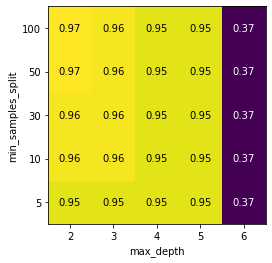

In [20]:
scores = np.array(results.mean_test_score).reshape(5, 5)

mglearn.tools.heatmap(scores, xlabel='max_depth', xticklabels=param_grid['max_depth'], ylabel='min_samples_split', yticklabels=param_grid['min_samples_split'], cmap='viridis')

In [21]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [22]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(
    SVC(), param_grid, cv=5, return_train_score=True
)
grid_search

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

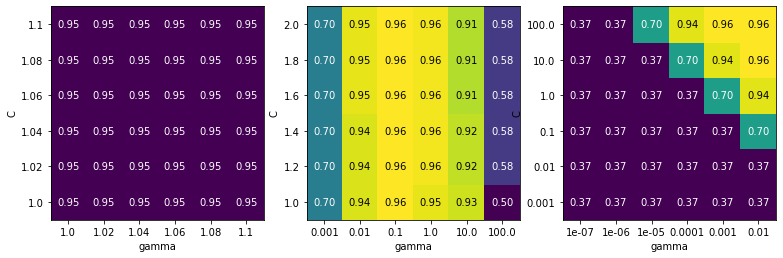

In [24]:
fig, axes = plt.subplots(1,3, figsize=(13,5))

param_grid_linear = {
    'C':np.linspace(1.0, 1.1, 6),
    'gamma': np.linspace(1.0, 1.1, 6) 
}

param_grid_one_log = {
    'C':np.linspace(1,2,6), 
    'gamma': np.logspace(-3,2,6) 
}

param_grid_range = {
    'C': np.logspace(-3,2,6),
    'gamma': np.logspace(-7,-2,6) 
}

for param_grid, ax in zip(
        [param_grid_linear, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6,6)
    

    # 교차 검증 평균 점수 히트맵 그래프
    scores_image = mglearn.tools.heatmap(scores, 
        xlabel='gamma', xticklabels=param_grid['gamma'],
        ylabel='C', yticklabels=param_grid['C'],
        cmap='viridis', ax=ax                                       
    )

* 처음에는 간격을 넓게 하고, 매우 각단적인 값을 적용 후, 매개변수를 바꿔가며 정확도가 변하는지 살펴보기.